In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from openmc.deplete import ResultsList, Results
import openmc
import os
import json

In [23]:
openmc.config['cross_sections'] = '/home/nikita/science/data/endfb-vii.1-hdf5/cross_sections.xml'
openmc.config['chain_file'] = '/home/nikita/science/data/chains/chain_endfb71_pwr.xml'

In [24]:
res_path = 'results/depletion/v3'

In [25]:
json.load(open(os.path.join(res_path,os.listdir(res_path)[0],'results.json')))

JSONDecodeError: Expecting value: line 1 column 49 (char 48)

In [26]:
f = h5py.File(os.path.join(res_path,os.listdir(res_path)[0],'depletion_results.h5'), 'r')
f

<HDF5 file "depletion_results.h5" (mode r)>

In [27]:
results =Results.from_hdf5(os.path.join(res_path,os.listdir(res_path)[0],'depletion_results.h5'))
results

[<StepResult: t=0.0, dt=7200.0, source=30000.0>,
 <StepResult: t=7200.0, dt=7200.0, source=30000.0>,
 <StepResult: t=14400.0, dt=7200.0, source=30000.0>,
 <StepResult: t=21600.0, dt=7200.0, source=30000.0>,
 <StepResult: t=28800.0, dt=7200.0, source=30000.0>,
 <StepResult: t=36000.0, dt=7200.0, source=30000.0>,
 <StepResult: t=43200.0, dt=7200.0, source=30000.0>,
 <StepResult: t=50400.0, dt=7200.0, source=30000.0>,
 <StepResult: t=57600.0, dt=7200.0, source=30000.0>,
 <StepResult: t=64800.0, dt=7200.0, source=30000.0>,
 <StepResult: t=72000.0, dt=7200.0, source=30000.0>,
 <StepResult: t=79200.0, dt=7200.0, source=30000.0>,
 <StepResult: t=86400.0, dt=7200.0, source=30000.0>,
 <StepResult: t=93600.0, dt=7200.0, source=30000.0>,
 <StepResult: t=100800.0, dt=7200.0, source=30000.0>,
 <StepResult: t=108000.0, dt=7200.0, source=30000.0>,
 <StepResult: t=115200.0, dt=7200.0, source=30000.0>,
 <StepResult: t=122400.0, dt=7200.0, source=30000.0>,
 <StepResult: t=129600.0, dt=7200.0, source=300

In [28]:
dir(results)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'append',
 'clear',
 'copy',
 'count',
 'export_to_materials',
 'extend',
 'from_hdf5',
 'get_activity',
 'get_atoms',
 'get_decay_heat',
 'get_depletion_time',
 'get_eigenvalue',
 'get_keff',
 'get_mass',
 'get_reaction_rate',
 'get_step_where',
 'get_times',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [29]:
for r in results:
    print(r.time)

[   0. 7200.]
[ 7200. 14400.]
[14400. 21600.]
[21600. 28800.]
[28800. 36000.]
[36000. 43200.]
[43200. 50400.]
[50400. 57600.]
[57600. 64800.]
[64800. 72000.]
[72000. 79200.]
[79200. 86400.]
[86400. 93600.]
[ 93600. 100800.]
[100800. 108000.]
[108000. 115200.]
[115200. 122400.]
[122400. 129600.]
[129600. 136800.]
[136800. 144000.]
[144000. 151200.]
[151200. 158400.]
[158400. 165600.]
[165600. 172800.]
[172800. 180000.]
[180000. 187200.]
[187200. 194400.]
[194400. 201600.]
[201600. 208800.]
[208800. 216000.]
[216000. 223200.]
[223200. 230400.]
[230400. 237600.]
[237600. 244800.]
[244800. 252000.]
[252000. 259200.]
[259200. 266400.]
[266400. 274320.]
[274320. 283032.]
[283032.  292615.2]
[292615.2  303156.72]
[303156.72  314752.392]
[314752.392  327507.6312]
[327507.6312  341538.39432]
[341538.39432  356972.233752]
[356972.233752  373949.4571272]
[373949.4571272  392624.40283992]
[392624.40283992 413166.84312391]
[413166.84312391 435763.5274363 ]
[435763.5274363  460619.88017993]
[460619.

In [30]:
results.get_atoms('2','U235')

(array([0.00000000e+00, 7.20000000e+03, 1.44000000e+04, 2.16000000e+04,
        2.88000000e+04, 3.60000000e+04, 4.32000000e+04, 5.04000000e+04,
        5.76000000e+04, 6.48000000e+04, 7.20000000e+04, 7.92000000e+04,
        8.64000000e+04, 9.36000000e+04, 1.00800000e+05, 1.08000000e+05,
        1.15200000e+05, 1.22400000e+05, 1.29600000e+05, 1.36800000e+05,
        1.44000000e+05, 1.51200000e+05, 1.58400000e+05, 1.65600000e+05,
        1.72800000e+05, 1.80000000e+05, 1.87200000e+05, 1.94400000e+05,
        2.01600000e+05, 2.08800000e+05, 2.16000000e+05, 2.23200000e+05,
        2.30400000e+05, 2.37600000e+05, 2.44800000e+05, 2.52000000e+05,
        2.59200000e+05, 2.66400000e+05, 2.74320000e+05, 2.83032000e+05,
        2.92615200e+05, 3.03156720e+05, 3.14752392e+05, 3.27507631e+05,
        3.41538394e+05, 3.56972234e+05, 3.73949457e+05, 3.92624403e+05,
        4.13166843e+05, 4.35763527e+05, 4.60619880e+05, 4.87961868e+05,
        5.18038055e+05, 5.51121861e+05, 5.87514047e+05, 6.275454

In [31]:
results.get_decay_heat('2')

(array([0.00000000e+00, 7.20000000e+03, 1.44000000e+04, 2.16000000e+04,
        2.88000000e+04, 3.60000000e+04, 4.32000000e+04, 5.04000000e+04,
        5.76000000e+04, 6.48000000e+04, 7.20000000e+04, 7.92000000e+04,
        8.64000000e+04, 9.36000000e+04, 1.00800000e+05, 1.08000000e+05,
        1.15200000e+05, 1.22400000e+05, 1.29600000e+05, 1.36800000e+05,
        1.44000000e+05, 1.51200000e+05, 1.58400000e+05, 1.65600000e+05,
        1.72800000e+05, 1.80000000e+05, 1.87200000e+05, 1.94400000e+05,
        2.01600000e+05, 2.08800000e+05, 2.16000000e+05, 2.23200000e+05,
        2.30400000e+05, 2.37600000e+05, 2.44800000e+05, 2.52000000e+05,
        2.59200000e+05, 2.66400000e+05, 2.74320000e+05, 2.83032000e+05,
        2.92615200e+05, 3.03156720e+05, 3.14752392e+05, 3.27507631e+05,
        3.41538394e+05, 3.56972234e+05, 3.73949457e+05, 3.92624403e+05,
        4.13166843e+05, 4.35763527e+05, 4.60619880e+05, 4.87961868e+05,
        5.18038055e+05, 5.51121861e+05, 5.87514047e+05, 6.275454

In [32]:
results.get_atoms(mat='2', nuc='U235')[1], results.get_atoms(mat='2', nuc='U238')[1]

(array([4.02802205e+23, 4.02794025e+23, 4.02785882e+23, 4.02777778e+23,
        4.02769705e+23, 4.02761587e+23, 4.02753405e+23, 4.02745272e+23,
        4.02737126e+23, 4.02728966e+23, 4.02720871e+23, 4.02712627e+23,
        4.02704492e+23, 4.02696360e+23, 4.02688189e+23, 4.02680022e+23,
        4.02671896e+23, 4.02663686e+23, 4.02655552e+23, 4.02647515e+23,
        4.02639318e+23, 4.02631222e+23, 4.02623100e+23, 4.02614985e+23,
        4.02606807e+23, 4.02598671e+23, 4.02590530e+23, 4.02582416e+23,
        4.02574286e+23, 4.02566085e+23, 4.02557995e+23, 4.02549839e+23,
        4.02541766e+23, 4.02533669e+23, 4.02525506e+23, 4.02517296e+23,
        4.02509076e+23, 4.02500918e+23, 4.02492012e+23, 4.02482132e+23,
        4.02471343e+23, 4.02459370e+23, 4.02446339e+23, 4.02431793e+23,
        4.02415862e+23, 4.02398362e+23, 4.02379163e+23, 4.02357783e+23,
        4.02334810e+23, 4.02309397e+23, 4.02281299e+23, 4.02250639e+23,
        4.02216711e+23, 4.02178944e+23, 4.02137773e+23, 4.020927

In [33]:
f.keys()

<KeysViewHDF5 ['depletion time', 'eigenvalues', 'materials', 'nuclides', 'number', 'reaction rates', 'reactions', 'source_rate', 'time']>

In [34]:
for key,value in f.items():
    try:
        print(key, value.shape)
    except:
        print(key, value)

depletion time (116,)
eigenvalues (116, 1, 2)
materials <HDF5 group "/materials" (1 members)>
nuclides <HDF5 group "/nuclides" (3819 members)>
number (116, 1, 1, 3819)
reaction rates (116, 1, 1, 421, 7)
reactions <HDF5 group "/reactions" (7 members)>
source_rate (116, 1)
time (116, 2)


In [35]:
f['number']

<HDF5 dataset "number": shape (116, 1, 1, 3819), type "<f8">

/tmp/ipykernel_2685296/2693357386.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  plt.plot(np.array(f['eigenvalues']).reshape((-1,2))[:,0])


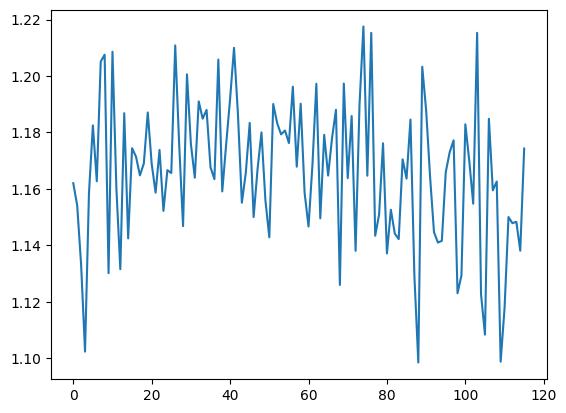

In [36]:
plt.plot(np.array(f['eigenvalues']).reshape((-1,2))[:,0])

In [37]:
for rname, rdata in f['reactions'].items():
    print(rname, rdata)

(n,2n) <HDF5 group "/reactions/(n,2n)" (0 members)>
(n,3n) <HDF5 group "/reactions/(n,3n)" (0 members)>
(n,4n) <HDF5 group "/reactions/(n,4n)" (0 members)>
(n,a) <HDF5 group "/reactions/(n,a)" (0 members)>
(n,gamma) <HDF5 group "/reactions/(n,gamma)" (0 members)>
(n,p) <HDF5 group "/reactions/(n,p)" (0 members)>
fission <HDF5 group "/reactions/fission" (0 members)>


In [38]:
f['reaction rates']

<HDF5 dataset "reaction rates": shape (116, 1, 1, 421, 7), type "<f8">

In [39]:
dir(f['nuclides'].items())

['__abstractmethods__',
 '__and__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_abc_impl',
 '_from_iterable',
 '_hash',
 '_mapping',
 'isdisjoint']

In [40]:
i = 0
for key,value in f['nuclides'].items():
    # if len(value)>0:
        print(key, value.keys())
        i+=1
    # if i>=5:
    #     break    

Ac206 <KeysViewHDF5 []>
Ac206_m1 <KeysViewHDF5 []>
Ac207 <KeysViewHDF5 []>
Ac208 <KeysViewHDF5 []>
Ac208_m1 <KeysViewHDF5 []>
Ac209 <KeysViewHDF5 []>
Ac210 <KeysViewHDF5 []>
Ac211 <KeysViewHDF5 []>
Ac212 <KeysViewHDF5 []>
Ac213 <KeysViewHDF5 []>
Ac214 <KeysViewHDF5 []>
Ac215 <KeysViewHDF5 []>
Ac216 <KeysViewHDF5 []>
Ac216_m1 <KeysViewHDF5 []>
Ac217 <KeysViewHDF5 []>
Ac218 <KeysViewHDF5 []>
Ac219 <KeysViewHDF5 []>
Ac220 <KeysViewHDF5 []>
Ac221 <KeysViewHDF5 []>
Ac222 <KeysViewHDF5 []>
Ac222_m1 <KeysViewHDF5 []>
Ac223 <KeysViewHDF5 []>
Ac224 <KeysViewHDF5 []>
Ac225 <KeysViewHDF5 []>
Ac226 <KeysViewHDF5 []>
Ac227 <KeysViewHDF5 []>
Ac228 <KeysViewHDF5 []>
Ac229 <KeysViewHDF5 []>
Ac230 <KeysViewHDF5 []>
Ac231 <KeysViewHDF5 []>
Ac232 <KeysViewHDF5 []>
Ac233 <KeysViewHDF5 []>
Ac234 <KeysViewHDF5 []>
Ac235 <KeysViewHDF5 []>
Ac236 <KeysViewHDF5 []>
Ag100 <KeysViewHDF5 []>
Ag100_m1 <KeysViewHDF5 []>
Ag101 <KeysViewHDF5 []>
Ag101_m1 <KeysViewHDF5 []>
Ag102 <KeysViewHDF5 []>
Ag102_m1 <KeysViewHDF5

In [41]:
dir(value)

['_MutableMapping__marker',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_d',
 '_e',
 '_gcpl_crt_order',
 '_id',
 '_ipython_key_completions_',
 '_lapl',
 '_lcpl',
 'attrs',
 'build_virtual_dataset',
 'clear',
 'copy',
 'create_dataset',
 'create_dataset_like',
 'create_group',
 'create_virtual_dataset',
 'file',
 'get',
 'id',
 'items',
 'keys',
 'move',
 'name',
 'parent',
 'pop',
 'popitem',
 'ref',
 'regionref',
 'requir